### Haberman'sSurvival Data set
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Attribute Information:

- Age of patient at time of operation (numerical)
-  Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)

- 1 = the patient survived 5 years or longer
- 2 = the patient died within 5 year


#### The objective here is to find the survival status of patients who had undergone the surgery for breast cancer. 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
haberman = pd.read_csv("haberman.csv",header=None)
haberman.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# 1. How many data points and features are present?
haberman.shape

(306, 4)

##### Oberservations:
    We can see that there are 306 datapoints and 4 columns present in the data.
    Columns are not named so let's first name the columns.

In [6]:
haberman.columns = ['Age_AtTheTimeofOperation','Year_OfOperation','NumberOf_PostiveAxillaryNodes','SurvivalStatus']
haberman.columns

Index(['Age_AtTheTimeofOperation', 'Year_OfOperation',
       'NumberOf_PostiveAxillaryNodes', 'SurvivalStatus'],
      dtype='object')

In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age_AtTheTimeofOperation       306 non-null    int64
 1   Year_OfOperation               306 non-null    int64
 2   NumberOf_PostiveAxillaryNodes  306 non-null    int64
 3   SurvivalStatus                 306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


##### Observations: 
    The dataset doesnot contain any missing values and we can see that SurvivalStatus column is the class attribute.

In [8]:
# 2. From prior information, we know that there are 2 categories present in SurvivalStatus column, class 1 for survived and class 2 for not survived
# Lets verify that

haberman.SurvivalStatus.unique()

array([1, 2], dtype=int64)

In [9]:
# 3. Lets findout number of patients survived the treatment and not survived the treatment.

(haberman.SurvivalStatus).value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

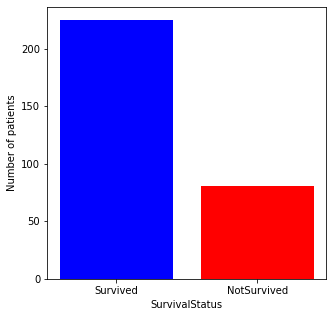

In [10]:
plt.figure(figsize=(5,5))
x = ['Survived','NotSurvived']
plt.bar(x,list((haberman.SurvivalStatus).value_counts()),color=['b','r'])
plt.xlabel("SurvivalStatus")
plt.ylabel("Number of patients")
plt.show()

##### Observations:
    Out of 306 patients who has undergone surgery 225 survived for 5 years or longer and 81 patients died within 5 years of surgery

### Now lets find which features that are more useful in predicting the survival status of a patient.

In [11]:
# Create=ing two dataframes, one with data of survived patients and other with data of not_survived patient.
survived = haberman.loc[haberman["SurvivalStatus"] == 1]
not_survived = haberman.loc[haberman["SurvivalStatus"] == 2]

In [12]:
# First let's analyse the age column

haberman['Age_AtTheTimeofOperation'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age_AtTheTimeofOperation, dtype: float64

##### Observations:  
The age of patients starts from 30 to 83 and mean patient age is 52.

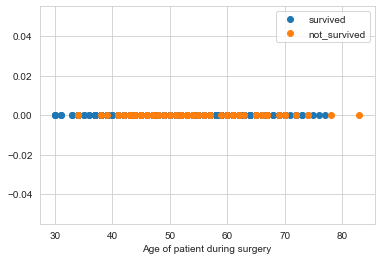

In [65]:
plt.plot(survived['Age_AtTheTimeofOperation'],np.zeros_like(survived['Age_AtTheTimeofOperation']),'o',label='survived')
plt.plot(not_survived['Age_AtTheTimeofOperation'],np.zeros_like(not_survived['Age_AtTheTimeofOperation']),'o',label='not_survived')
plt.xlabel('Age of patient during surgery')
plt.legend()

C:\Users\Bhuvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


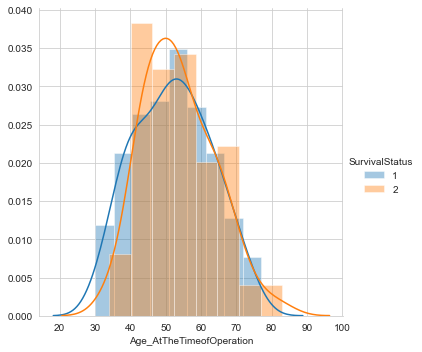

In [66]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="SurvivalStatus", size=5) \
   .map(sns.distplot, "Age_AtTheTimeofOperation") \
   .add_legend();
plt.show();

##### Observation:
    we can see that there is huge overlap of survival and not_survival data points when we used age feature for plotting.
###### Hence, we can say that patient survival rate  doesnot depend on his age, his/her age doesn't directly affect whether a patient survives after treatment.

In [67]:
# Let's analyse the second column - Year of surgery/operation
haberman.columns

Index(['Age_AtTheTimeofOperation', 'Year_OfOperation',
       'NumberOf_PostiveAxillaryNodes', 'SurvivalStatus'],
      dtype='object')

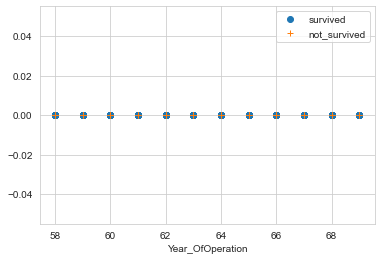

In [68]:
plt.plot(survived['Year_OfOperation'],np.zeros_like(survived['Year_OfOperation']),'o',label='survived')
plt.plot(not_survived['Year_OfOperation'],np.zeros_like(not_survived['Year_OfOperation']),'+',label='not_survived')
plt.xlabel('Year_OfOperation')
plt.legend()

In [71]:
survived['Year_OfOperation'].unique()

array([64, 62, 65, 59, 58, 60, 61, 67, 63, 69, 66, 68], dtype=int64)

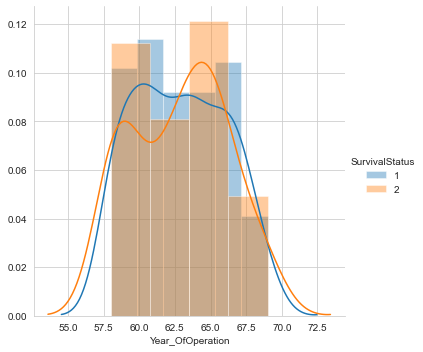

In [75]:
sns.FacetGrid(haberman, hue="SurvivalStatus", size=5) \
   .map(sns.distplot, "Year_OfOperation") \
   .add_legend();
plt.show();

##### Observation:
    From the graphs above we can say that, given year of surgery we can't predict the patient survival rate directly.

In [ ]:
# Let's analyse the NumberOf_PostiveAxillaryNodes column

In [80]:
haberman['NumberOf_PostiveAxillaryNodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: NumberOf_PostiveAxillaryNodes, dtype: float64

In [82]:
# haberman[haberman['NumberOf_PostiveAxillaryNodes'] == 52]

,Age_AtTheTimeofOperation,Year_OfOperation,NumberOf_PostiveAxillaryNodes,SurvivalStatus
62,43,58,52,2


Text(0.5, 0, 'NumberOf_PostiveAxillaryNodes')

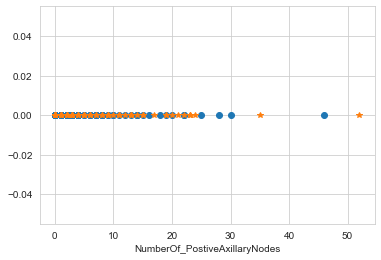

In [89]:
plt.plot(survived['NumberOf_PostiveAxillaryNodes'],np.zeros_like(survived['NumberOf_PostiveAxillaryNodes']),'o',label='survived')
plt.plot(not_survived['NumberOf_PostiveAxillaryNodes'],np.zeros_like(not_survived['NumberOf_PostiveAxillaryNodes']),'*',label='not_survived')
plt.xlabel('NumberOf_PostiveAxillaryNodes')

C:\Users\Bhuvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


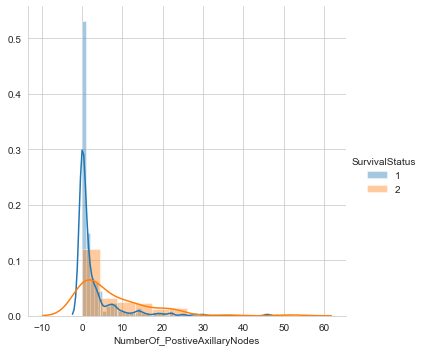

In [91]:
sns.FacetGrid(haberman, hue="SurvivalStatus", size=5) \
   .map(sns.distplot, "NumberOf_PostiveAxillaryNodes") \
   .add_legend();
plt.show();
            

In [93]:
not_survived['NumberOf_PostiveAxillaryNodes'].unique()

array([ 0,  9, 21, 23,  1, 52,  2,  6, 19,  3,  5, 20, 11,  7, 10, 13,  4,
       24, 12, 15, 14, 35, 17, 22,  8], dtype=int64)

In [94]:
survived['NumberOf_PostiveAxillaryNodes'].unique()

array([ 1,  3,  0,  2,  4, 10, 30,  7, 13,  6, 15, 11,  5,  8, 20, 14, 16,
       12, 46, 19, 18, 22,  9, 25, 28], dtype=int64)

##### Observation:
    Having axillary nodes(positive) or not having axillary nodes(negative) doesn't have direct impact on patient's survival.
    From above observations we can see that a patients with as many as 22 to 46 positive axillary nodes survived while 
    patients with few or without(0) positive axillary nodes died.
    We can't directly predict patient survival based on number of positive axillary nodes. 

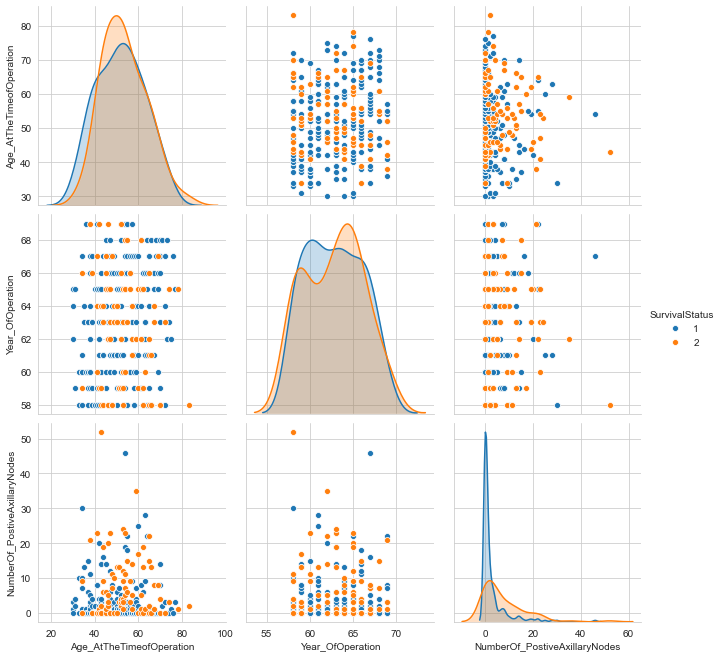

In [101]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="SurvivalStatus",size=3)
plt.show()

### None of the features alone has direct impact on patients survival. Analysing them together like how age and year of surgery or age and number of positive axillary nodes impact survival rate may help us predict patients survival more accurately

- Using PCA to convert data into 2-D to see the combined effect of features on patient's survival rate

In [42]:
labels = haberman.SurvivalStatus 
data = haberman.drop(columns="SurvivalStatus")

In [37]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(306, 3)


In [38]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [39]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (306, 2)


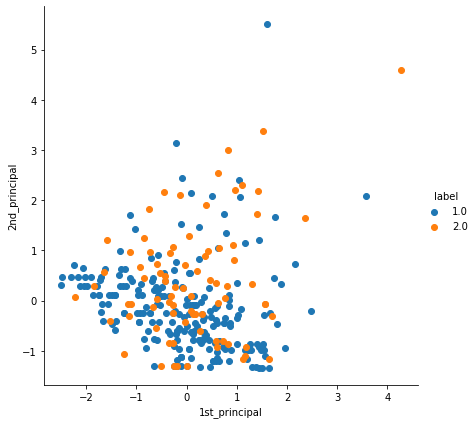

In [40]:

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

There is no clear boundary separating survived and non-survived patients. Theses features are not good predictors.

# Final Remarks:
These features are not enough to predict the survival of breast cancer patients, who has undergone surgery.
We need more features to predict the survival status of patient.